# Problem: 
### 1. Companies often receive thousands of resumes on each job posting. When the company got those resumes they need to do resume screening by machine or by manually in order to know if the resume is fit the position. It is hard that HR needs to screen through thousands of resumes. 
### 2. When companies collect resumes through online advertisements, they want to find candidates most related to the job post from a big pool of resumes. The pain point of finding the right candidates is that they need to manually categorize those resumes based on their skills and experience.
### A solution of using python optical character recognition to read those resumes and get the keyword from the resume by using natural language processing. Then categorize and match them with the job description or roles ideally looking for. This solution also is beneficial for companies who want to look for a good candidate from thousands of resumes online, and categorize resumes to promote the job.  

# Appoaches:
### Resumes are usually pdf files, so it is much easy that us to choose a fast and accurate optical character recognition model to read the text inside the pdf files. (In here we want to assume all resumes are one page, we will also deal with two pages or more resumes when we have more time).
Three major OCR advantages and disadvantages:
* Tesseract OCR is performing well for high-resolution images. Certain morphological operations such as dilation, erosion, OTSU binarization can help increase Tesseract OCR performance.
* EasyOCR is a lightweight model which is giving a good performance for receipt or PDF conversion. It is giving more accurate results with organized texts like pdf files, receipts, and bills.
* Keras-OCR is image specific OCR tool. If text is inside the image and the fonts and colors are unorganized, Keras-ocr gives good results.

### We decided to use the Tesseract OCR since we can convert pdf to image that would be great to read by Tesseract OCR.

### Libary and drive mount

In [ ]:
!apt-get update
!sudo apt install tesseract-ocr
!pip install pytesseract

Hit:1 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease
Get:2 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Hit:3 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:4 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Get:5 http://archive.ubuntu.com/ubuntu bionic-backports InRelease [83.3 kB]
Ign:6 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:7 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Hit:8 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Hit:9 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease
Hit:10 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Hit:11 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu bionic InRelease
Hit:12 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic InRelease
Fetched 261 kB in 2s (172 kB/s)
Reading package lis

In [ ]:
!apt-get install poppler-utils
!pip install pdf2image

Reading package lists... Done
Building dependency tree       
Reading state information... Done
poppler-utils is already the newest version (0.62.0-2ubuntu2.14).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 20 not upgraded.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pytesseract
import PIL.Image
from pytesseract import image_to_data, Output
from pdf2image import convert_from_path, convert_from_bytes
from IPython.display import display, Image
import cv2 as cv
import numpy as np
import re

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Add a shortcut of the Resume_Data folder to My Drive
file_path = "/content/drive/MyDrive/CISC3440_Project/Resume_Data/"

In [ ]:
import os
# list file and directories
file_names = os.listdir(file_path)
print(file_names)

['Software Engineer Resume Example.pdf', 'data-scientist-resume-example.pdf', '1. Data Scientist.pdf', 'java-developer-resume-example.pdf']


In [ ]:
resume_path = f"{file_path}{file_names[0]}"
resume_path

'/content/drive/MyDrive/CISC3440_Project/Resume_Data/Software Engineer Resume Example.pdf'

In [ ]:
open(resume_path)

<_io.TextIOWrapper name='/content/drive/MyDrive/CISC3440_Project/Resume_Data/Software Engineer Resume Example.pdf' mode='r' encoding='UTF-8'>

### Try to extract the page’s text with PageObject.extractText() but not working

In [ ]:
!pip install PyPDF2

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# importing required modules
import PyPDF2
  
# creating a pdf file object
pdfFileObj = open(resume_path, 'rb')
  
# creating a pdf reader object
pdfReader = PyPDF2.PdfFileReader(pdfFileObj)
  
# # printing number of pages in pdf file
# print(pdfReader.numPages)
  
# creating a page object
pageObj = pdfReader.getPage(0)

print( type(pageObj))
# extracting text from page
print(pageObj.extractText())
  
# closing the pdf file object
# pdfFileObj.close()

<class 'PyPDF2._page.PageObject'>



## Convert PDF to image

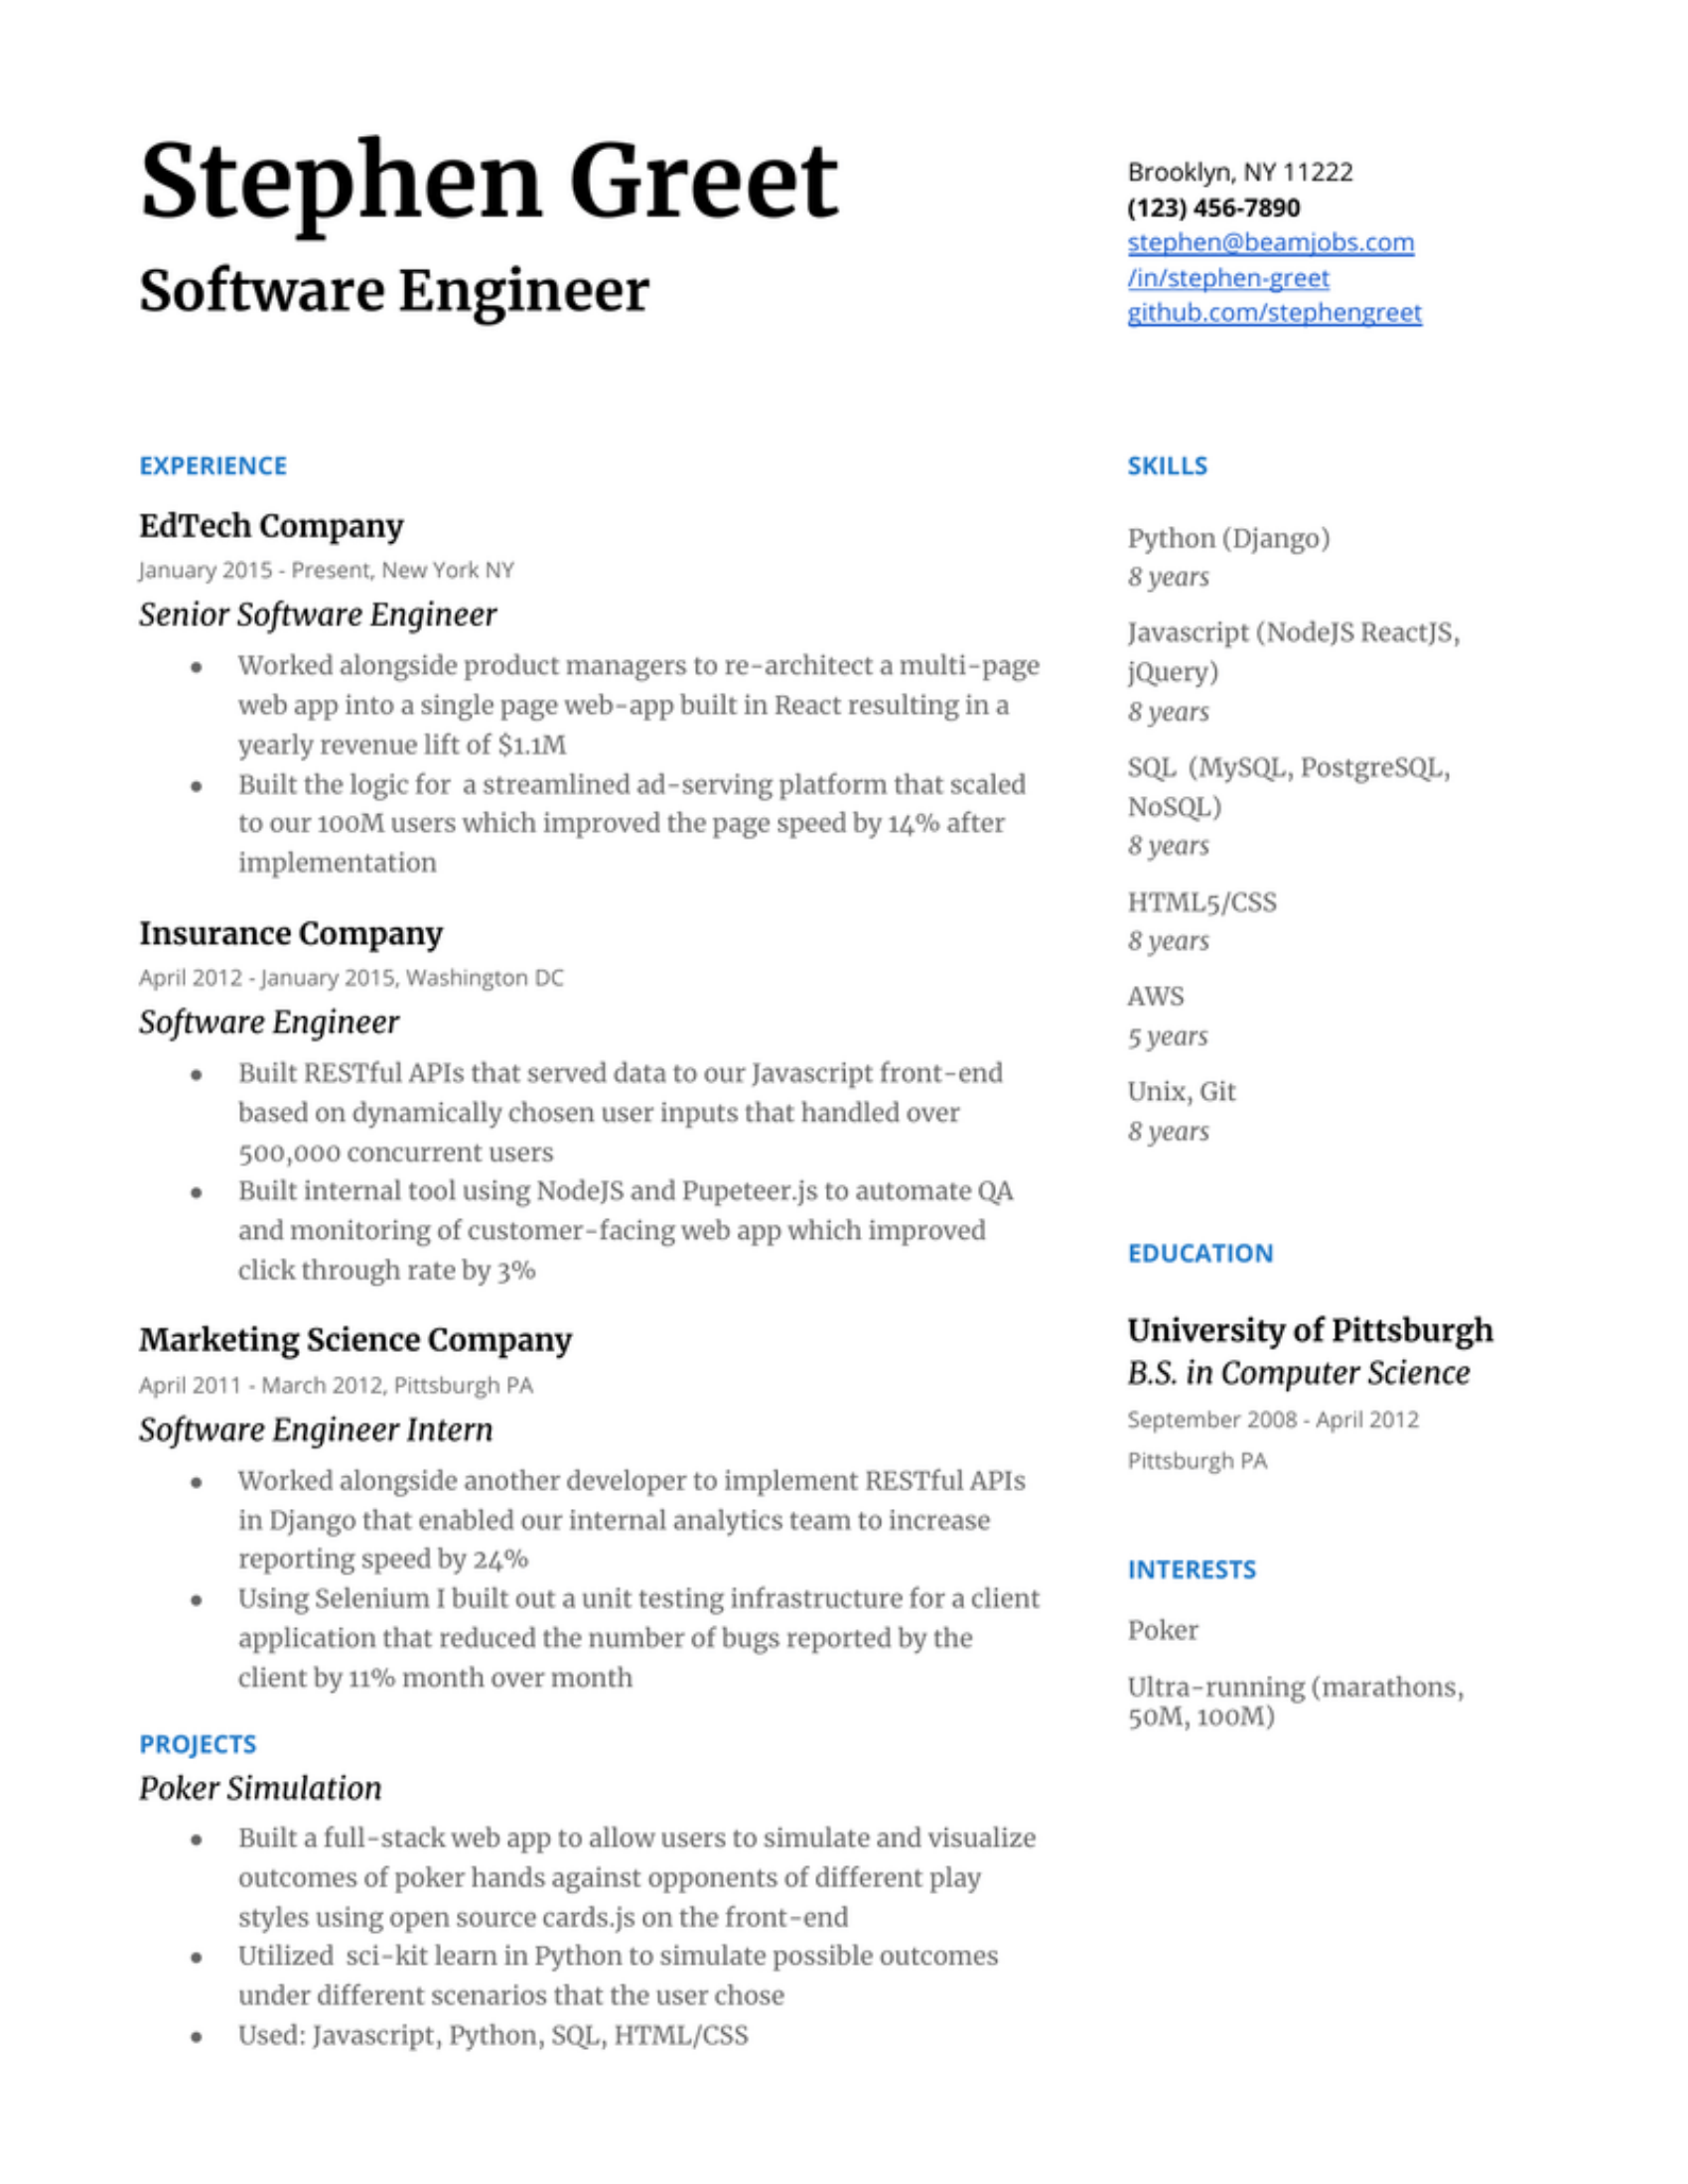

In [ ]:
# read resume
resume_image = convert_from_path(resume_path, fmt='PNG')[0]
resume_image

## Extracting text from PDF

In [ ]:
resume_text = pytesseract.image_to_data(resume_image, output_type='data.frame') # read the text of image and convert the output into dataframe

In [ ]:
resume_text

,level,page_num,block_num,par_num,line_num,word_num,left,top,width,height,conf,text
0,1,1,0,0,0,0,0,0,1700,2200,-1,NaN
1,2,1,1,0,0,0,144,135,701,108,-1,NaN
2,3,1,1,1,0,0,144,135,701,108,-1,NaN
3,4,1,1,1,1,0,144,135,701,108,-1,NaN
4,5,1,1,1,1,1,144,135,403,108,96,Stephen
...,...,...,...,...,...,...,...,...,...,...,...,...
419,5,1,22,1,1,1,1137,1688,178,28,91,Ultra-running
420,5,1,22,1,1,2,1322,1688,151,25,96,"(marathons,"
421,4,1,22,1,2,0,1138,1718,145,25,-1,NaN
422,5,1,22,1,2,1,1138,1719,60,24,96,"50M,"


### Visualize the read text on image

<class 'numpy.ndarray'>


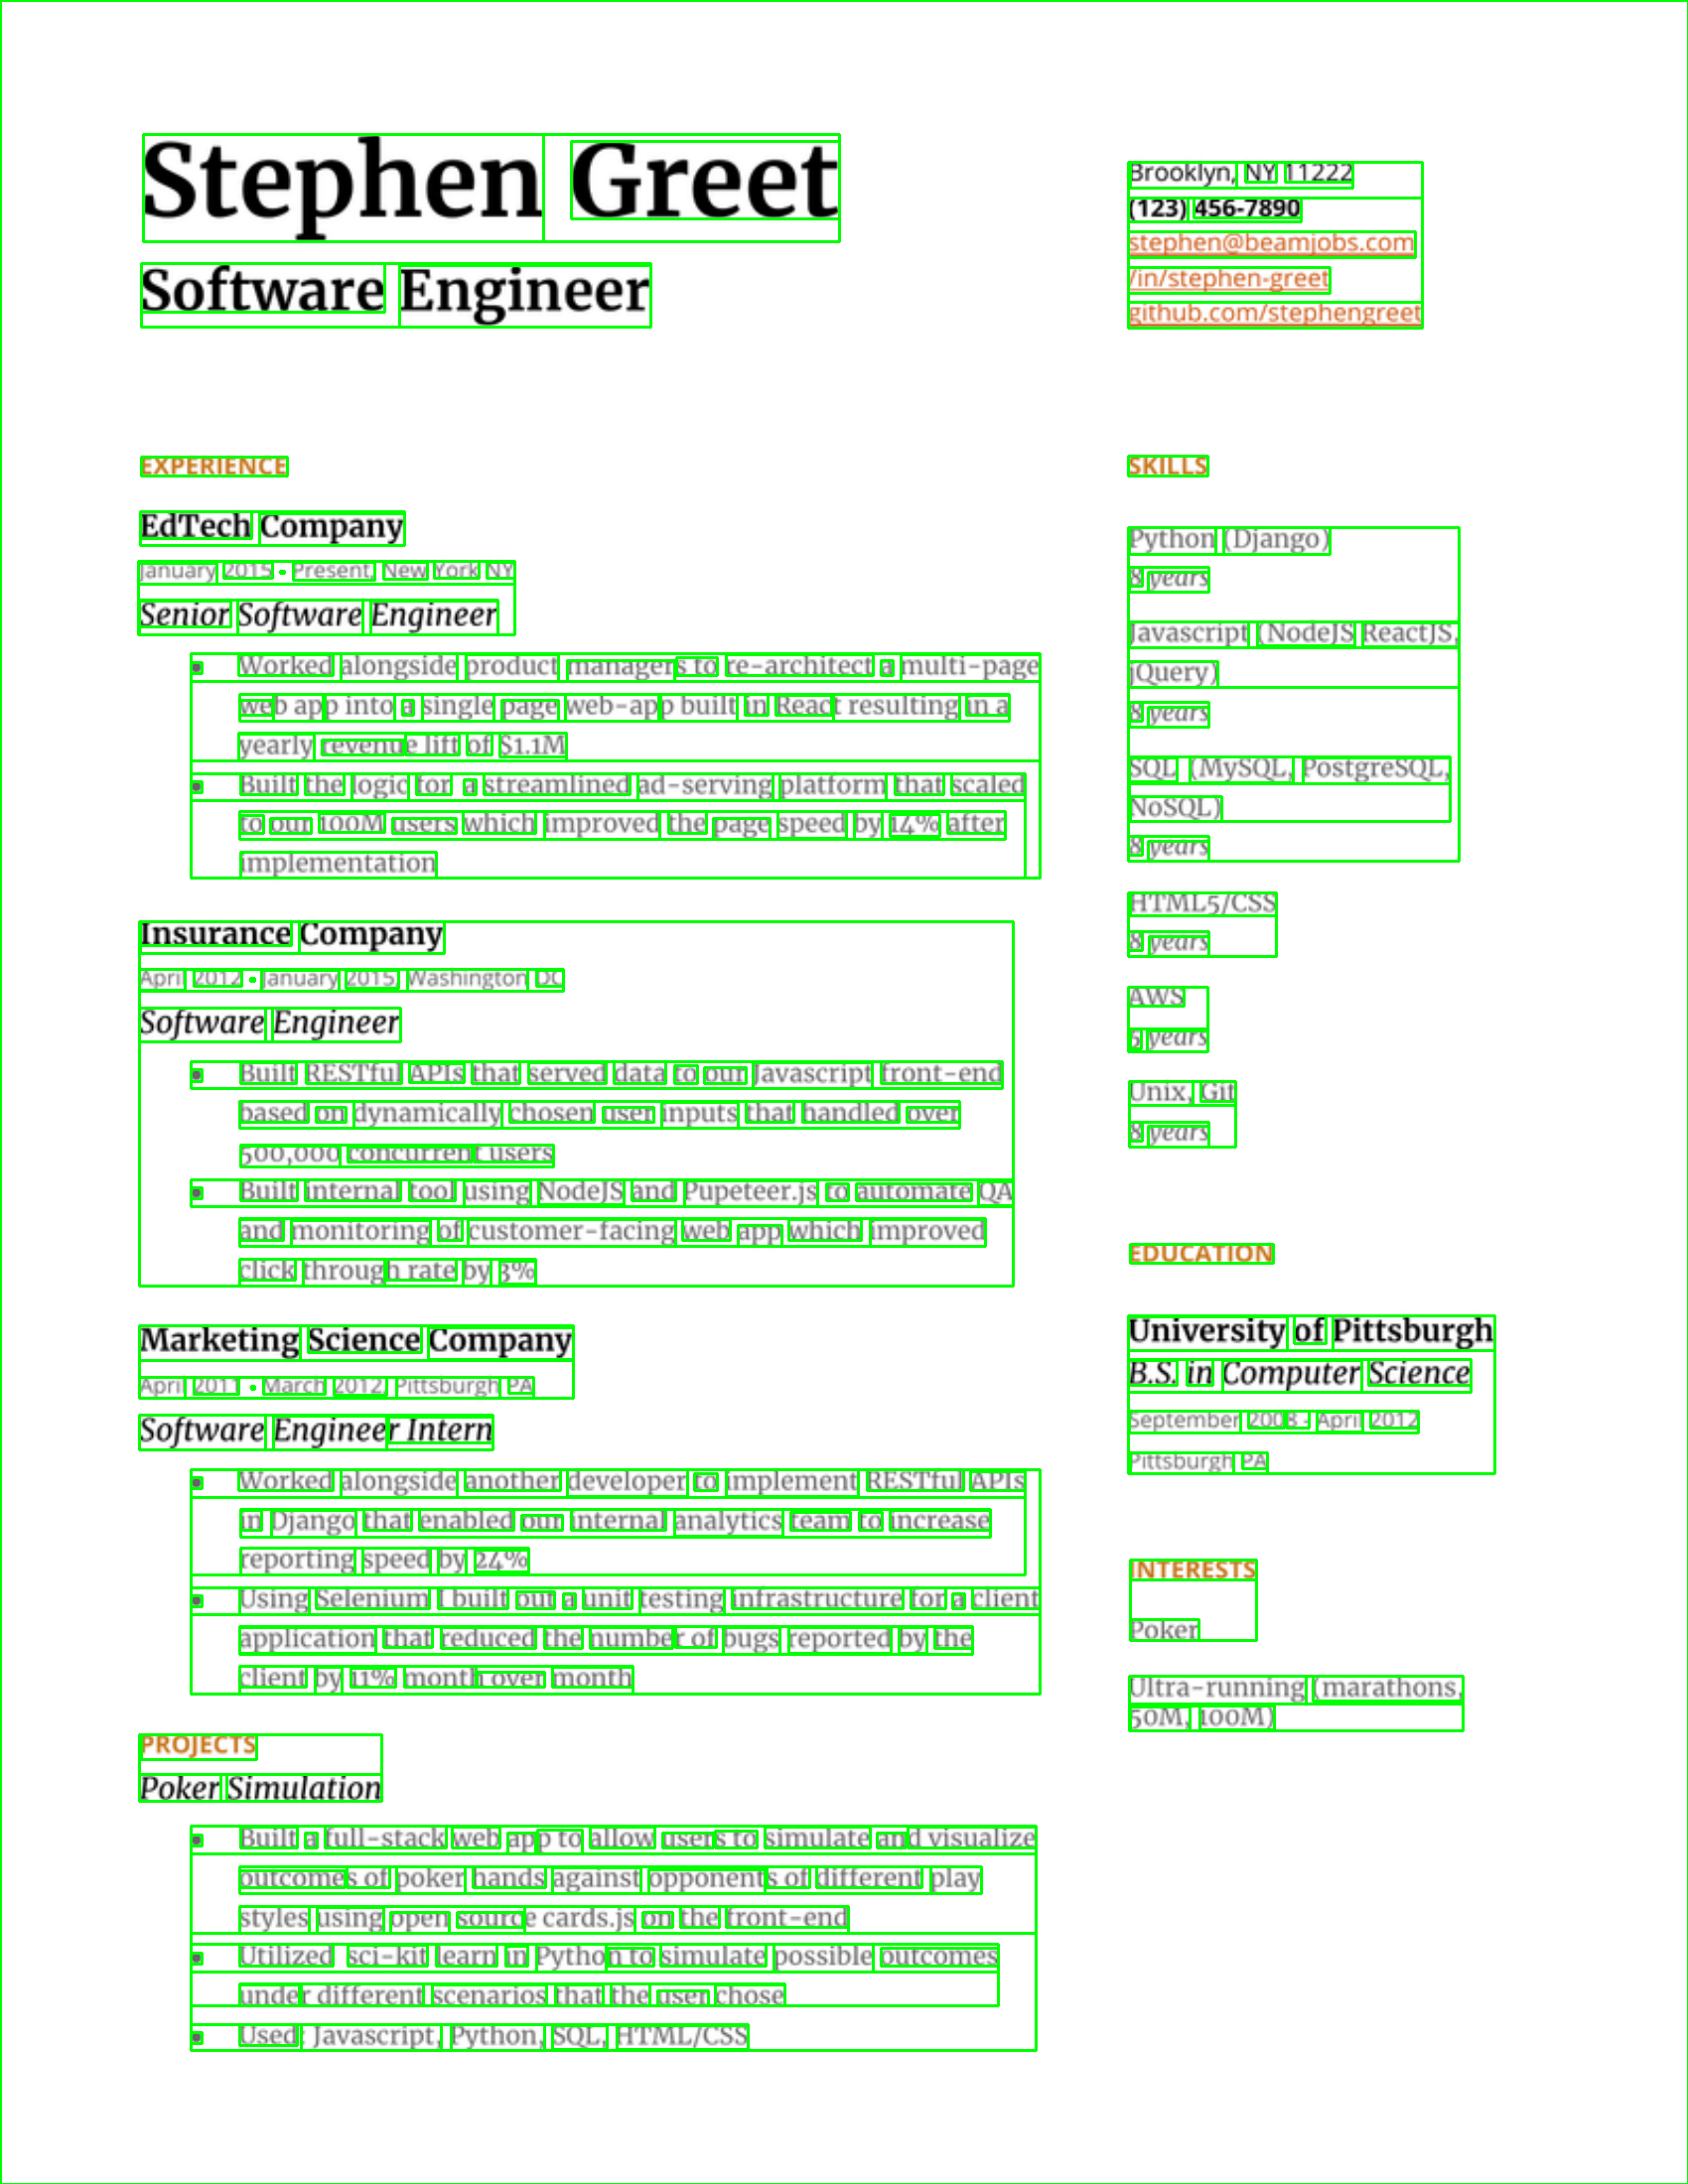

In [ ]:
# Draw box on image to visual the result of text reading
# import PIL
# from PIL import ImageDraw
import cv2
from google.colab.patches import cv2_imshow

# def draw_box(pdf_path, df, color='green', width=2):
  # image = convert_from_path(pdf_path, fmt='PNG')[0]
  # draw = ImageDraw.Draw(image)
  # for i in range(len(df)):
  #   (x, y, w, h) = (df['left'][i], df['top'][i], df['width'][i], df['height'][i])
  #   draw.rectangle((x, y, x + w, y + h), fill=color, width=width) 
  # return image

pages = convert_from_path(resume_path)
cv2_img = np.array(pages[0])
#img = cv2.resize(img, None, fx=0.5, fy=0.5)
print(type(cv2_img))
# cv2_img = cv2.imread(img)
length = len(resume_text['level'])

for i in range(length):
  d = resume_text
  (x, y, w, h) = (d['left'][i], d['top'][i], d['width'][i], d['height'][i])
  cv2.rectangle(cv2_img, (x, y), (x + w, y + h), (0, 255, 0), 2)


cv2_imshow(cv2_img)

## Clean Resume Text

In [ ]:
resumeText = pytesseract. image_to_string(resume_image)

In [ ]:
resumeText

'Stephen Greet\n\nSoftware Engineer\n\nEXPERIENCE\n\nEdTech Company\n\nJanuary 2015 - Present, New York NY\nSenior Software Engineer\n\ne Worked alongside product managers to re-architect a multi-page\nweb app into a single page web-app built in React resulting ina\nyearly revenue lift of $1.1M\n\ne Built the logic for a streamlined ad-serving platform that scaled\nto our 100M users which improved the page speed by 14% after\nimplementation\n\nInsurance Company\nApril 2012 - January 2015, Washington DC\nSoftware Engineer\ne Built RESTful APIs that served data to our Javascript front-end\nbased on dynamically chosen user inputs that handled over\n500,000 concurrent users\ne Built internal tool using NodeJS and Pupeteer.js to automate QA\nand monitoring of customer-facing web app which improved\nclick through rate by 3%\n\nMarketing Science Company\nApril 2011 - March 2012, Pittsburgh PA\n\nSoftware Engineer Intern\n\ne Worked alongside another developer to implement RESTful APIs\nin Dja

In [ ]:
print(resumeText)

Stephen Greet

Software Engineer

EXPERIENCE

EdTech Company

January 2015 - Present, New York NY
Senior Software Engineer

e Worked alongside product managers to re-architect a multi-page
web app into a single page web-app built in React resulting ina
yearly revenue lift of $1.1M

e Built the logic for a streamlined ad-serving platform that scaled
to our 100M users which improved the page speed by 14% after
implementation

Insurance Company
April 2012 - January 2015, Washington DC
Software Engineer
e Built RESTful APIs that served data to our Javascript front-end
based on dynamically chosen user inputs that handled over
500,000 concurrent users
e Built internal tool using NodeJS and Pupeteer.js to automate QA
and monitoring of customer-facing web app which improved
click through rate by 3%

Marketing Science Company
April 2011 - March 2012, Pittsburgh PA

Software Engineer Intern

e Worked alongside another developer to implement RESTful APIs
in Django that enabled our internal analyt

In [ ]:
import re
def clean_function(resumeText):
    resumeText = re.sub('http\S+\s*', ' ', resumeText)  # remove URLs
    resumeText = re.sub('RT|cc', ' ', resumeText)  # remove RT and cc
    resumeText = re.sub('#\S+', '', resumeText)  # remove hashtags
    resumeText = re.sub('@\S+', '  ', resumeText)  # remove mentions
    resumeText = re.sub('[%s]' % re.escape("""!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"""), ' ', resumeText)  # remove punctuations
    resumeText = re.sub(r'[^\x00-\x7f]',r' ', resumeText) 
    resumeText = re.sub('\s+', ' ', resumeText)  # remove extra whitespace
    resumeText = re.sub('\n', '', resumeText)  # remove new lines
    return resumeText

In [ ]:
clean_result = clean_function(resumeText)
clean_result

'Stephen Greet Software Engineer EXPERIENCE EdTech Company January 2015 Present New York NY Senior Software Engineer e Worked alongside product managers to re architect a multi page web app into a single page web app built in React resulting ina yearly revenue lift of 1 1M e Built the logic for a streamlined ad serving platform that scaled to our 100M users which improved the page speed by 14 after implementation Insurance Company April 2012 January 2015 Washington DC Software Engineer e Built RESTful APIs that served data to our Javascript front end based on dynamically chosen user inputs that handled over 500 000 concurrent users e Built internal tool using NodeJS and Pupeteer js to automate QA and monitoring of customer facing web app which improved click through rate by 3 Marketing Science Company April 2011 March 2012 Pittsburgh PA Software Engineer Intern e Worked alongside another developer to implement RESTful APIs in Django that enabled our internal analytics team to increase 

In [ ]:
print(clean_result)

Stephen Greet Software Engineer EXPERIENCE EdTech Company January 2015 Present New York NY Senior Software Engineer e Worked alongside product managers to re architect a multi page web app into a single page web app built in React resulting ina yearly revenue lift of 1 1M e Built the logic for a streamlined ad serving platform that scaled to our 100M users which improved the page speed by 14 after implementation Insurance Company April 2012 January 2015 Washington DC Software Engineer e Built RESTful APIs that served data to our Javascript front end based on dynamically chosen user inputs that handled over 500 000 concurrent users e Built internal tool using NodeJS and Pupeteer js to automate QA and monitoring of customer facing web app which improved click through rate by 3 Marketing Science Company April 2011 March 2012 Pittsburgh PA Software Engineer Intern e Worked alongside another developer to implement RESTful APIs in Django that enabled our internal analytics team to increase r

In [ ]:
#Find the most frequent words and based on that decide the category of this resume 
from collections import Counter

split_it = clean_result.split()
Counter = Counter(split_it)
most_freq = Counter.most_common(30)
print(most_freq)

[('e', 9), ('to', 9), ('a', 6), ('of', 6), ('the', 6), ('that', 6), ('years', 6), ('in', 5), ('by', 5), ('8', 5), ('Software', 4), ('Engineer', 4), ('web', 4), ('app', 4), ('Built', 4), ('Company', 3), ('page', 3), ('our', 3), ('users', 3), ('April', 3), ('2012', 3), ('Javascript', 3), ('and', 3), ('Pittsburgh', 3), ('Python', 3), ('January', 2), ('2015', 2), ('NY', 2), ('Worked', 2), ('alongside', 2)]


In [ ]:
#Since web, software, Javascript appears often we decided to put it in Web Designing.
#In the future, it would be interesting using classfication fo classify the reusme based on the fearues. 

In [ ]:
import pandas as pd
path = "/content/drive/MyDrive/CISC3440_Project/Resume_CSV/ResumeDataSet.csv"
df = pd.read_csv(path)

In [ ]:
#For the testing purpose we added the processed image data into our dataset. 
new_row = {'Category': 'Web Designing', 'Resume': clean_result}
df_added = df.append(new_row, ignore_index = True)
display(df_added)

,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."
...,...,...
958,Testing,â Willingness to accept the challenges. â ...
959,Testing,"PERSONAL SKILLS â¢ Quick learner, â¢ Eagerne..."
960,Testing,COMPUTER SKILLS & SOFTWARE KNOWLEDGE MS-Power ...
961,Testing,Skill Set OS Windows XP/7/8/8.1/10 Database MY...


In [ ]:
df.head(20)

,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."
5,Data Science,"SKILLS C Basics, IOT, Python, MATLAB, Data Sci..."
6,Data Science,Skills â¢ Python â¢ Tableau â¢ Data Visuali...
7,Data Science,Education Details \r\n B.Tech Rayat and Bahr...
8,Data Science,Personal Skills â¢ Ability to quickly grasp t...
9,Data Science,Expertise â Data and Quantitative Analysis â...


Natual Language Processing on resume text

##Data Exploration


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 962 entries, 0 to 961
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  962 non-null    object
 1   Resume    962 non-null    object
dtypes: object(2)
memory usage: 15.2+ KB


In [ ]:
#Display the categories of the dataset
data_labels = df['Category'].unique()
data_labels

array(['Data Science', 'HR', 'Advocate', 'Arts', 'Web Designing',
       'Mechanical Engineer', 'Sales', 'Health and fitness',
       'Civil Engineer', 'Java Developer', 'Business Analyst',
       'SAP Developer', 'Automation Testing', 'Electrical Engineering',
       'Operations Manager', 'Python Developer', 'DevOps Engineer',
       'Network Security Engineer', 'PMO', 'Database', 'Hadoop',
       'ETL Developer', 'DotNet Developer', 'Blockchain', 'Testing'],
      dtype=object)

In [ ]:
data_labels_sorted = sorted(data_labels)
print(data_labels_sorted)

['Advocate', 'Arts', 'Automation Testing', 'Blockchain', 'Business Analyst', 'Civil Engineer', 'Data Science', 'Database', 'DevOps Engineer', 'DotNet Developer', 'ETL Developer', 'Electrical Engineering', 'HR', 'Hadoop', 'Health and fitness', 'Java Developer', 'Mechanical Engineer', 'Network Security Engineer', 'Operations Manager', 'PMO', 'Python Developer', 'SAP Developer', 'Sales', 'Testing', 'Web Designing']


In [ ]:
#Display the  unique values of the dataset
item_counts_nml = df['Category'].value_counts(normalize = True)
print(item_counts_nml)

Java Developer               0.087318
Testing                      0.072765
DevOps Engineer              0.057173
Python Developer             0.049896
Web Designing                0.046778
HR                           0.045738
Hadoop                       0.043659
Blockchain                   0.041580
ETL Developer                0.041580
Operations Manager           0.041580
Data Science                 0.041580
Sales                        0.041580
Mechanical Engineer          0.041580
Arts                         0.037422
Database                     0.034304
Electrical Engineering       0.031185
Health and fitness           0.031185
PMO                          0.031185
Business Analyst             0.029106
DotNet Developer             0.029106
Automation Testing           0.027027
Network Security Engineer    0.025988
SAP Developer                0.024948
Civil Engineer               0.024948
Advocate                     0.020790
Name: Category, dtype: float64


In [ ]:
item_counts = df['Category'].value_counts().sort_index(ascending=True)
print(item_counts)

Advocate                     20
Arts                         36
Automation Testing           26
Blockchain                   40
Business Analyst             28
Civil Engineer               24
Data Science                 40
Database                     33
DevOps Engineer              55
DotNet Developer             28
ETL Developer                40
Electrical Engineering       30
HR                           44
Hadoop                       42
Health and fitness           30
Java Developer               84
Mechanical Engineer          40
Network Security Engineer    25
Operations Manager           40
PMO                          30
Python Developer             48
SAP Developer                24
Sales                        40
Testing                      70
Web Designing                45
Name: Category, dtype: int64


In [ ]:
result = 0;
for i in item_counts:
  result+= i

print(result )

962


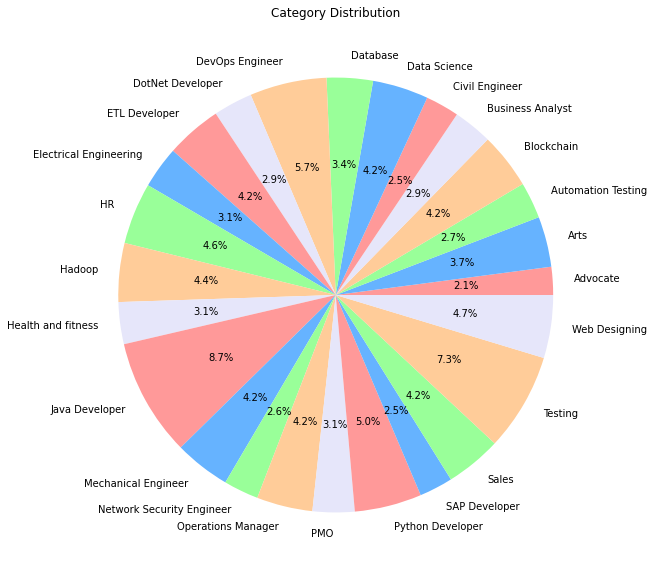

In [ ]:
from matplotlib.gridspec import GridSpec
import matplotlib.pyplot as plt

plt.figure(1, figsize=(22, 22))
grid = GridSpec(2,2)

colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99','#E6E6FA']
plt.subplot(grid[0,1], aspect =1, title = 'Category Distribution')
source_pie = plt.pie(item_counts, labels= data_labels_sorted, colors = colors, autopct = '%1.1f%%')
plt.show()


We can see the datas are scattered around and it's proportions are mostly even except few categories like Data Sceience. 

##Data Preprocessing

remove any unnecessary information from the Resume category.

Reference : 


https://blog.knoldus.com/best-approach-for-resume-screening-by-machine-learning/

In [ ]:
df['cleaned_resume'] = df.Resume.apply(lambda x : clean_function(x))

In [ ]:
df.head()

,Category,Resume,cleaned_resume
0,Data Science,Skills * Programming Languages: Python (pandas...,Skills Programming Languages Python pandas num...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...,Education Details May 2013 to May 2017 B E UIT...
2,Data Science,"Areas of Interest Deep Learning, Control Syste...",Areas of Interest Deep Learning Control System...
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...,Skills R Python SAP HANA Tableau SAP HANA SQL ...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab...",Education Details MCA YMCAUST Faridabad Haryan...


In [ ]:
df.shape

(962, 3)

In [ ]:
df.cleaned_resume[0]

'Skills Programming Languages Python pandas numpy scipy scikit learn matplotlib Sql Java JavaScript JQuery Machine learning Regression SVM Na ve Bayes KNN Random Forest Decision Trees Boosting techniques Cluster Analysis Word Embedding Sentiment Analysis Natural Language processing Dimensionality reduction Topic Modelling LDA NMF PCA Neural Nets Database Visualizations Mysql SqlServer Cassandra Hbase ElasticSearch D3 js DC js Plotly kibana matplotlib ggplot Tableau Others Regular Expression HTML CSS Angular 6 Logstash Kafka Python Flask Git Docker computer vision Open CV and understanding of Deep learning Education Details Data Science Assurance Associate Data Science Assurance Associate Ernst Young LLP Skill Details JAVASCRIPT Exprience 24 months jQuery Exprience 24 months Python Exprience 24 monthsCompany Details company Ernst Young LLP description Fraud Investigations and Dispute Services Assurance TECHNOLOGY ASSISTED REVIEW TAR Technology Assisted Review assists in a elerating the 

Confirming other than Capital letters and small letter, data is cleaned 

##Preprocessing the ‘cleaned_resume’

First, encode labels since it's form is not comprehensible to mahinces. 


Secondly, instead of using bag of word, we're going to use TF-IDF model because it contains information on the more important words and the les important ones as well. Also, it performs better than Bag of words.

In [ ]:
new_df = df.copy(deep = True)
new_df.head() 

,Category,Resume,cleaned_resume
0,Data Science,Skills * Programming Languages: Python (pandas...,Skills Programming Languages Python pandas num...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...,Education Details May 2013 to May 2017 B E UIT...
2,Data Science,"Areas of Interest Deep Learning, Control Syste...",Areas of Interest Deep Learning Control System...
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...,Skills R Python SAP HANA Tableau SAP HANA SQL ...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab...",Education Details MCA YMCAUST Faridabad Haryan...


In [ ]:
from sklearn.preprocessing import LabelEncoder

labels = ['Category']
le = LabelEncoder()
for i in labels:
  new_df[i] = le.fit_transform(new_df[i])

In [ ]:
new_df.head()

,Category,Resume,cleaned_resume
0,6,Skills * Programming Languages: Python (pandas...,Skills Programming Languages Python pandas num...
1,6,Education Details \r\nMay 2013 to May 2017 B.E...,Education Details May 2013 to May 2017 B E UIT...
2,6,"Areas of Interest Deep Learning, Control Syste...",Areas of Interest Deep Learning Control System...
3,6,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...,Skills R Python SAP HANA Tableau SAP HANA SQL ...
4,6,"Education Details \r\n MCA YMCAUST, Faridab...",Education Details MCA YMCAUST Faridabad Haryan...


In [ ]:
df.head()

,Category,Resume,cleaned_resume
0,Data Science,Skills * Programming Languages: Python (pandas...,Skills Programming Languages Python pandas num...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...,Education Details May 2013 to May 2017 B E UIT...
2,Data Science,"Areas of Interest Deep Learning, Control Syste...",Areas of Interest Deep Learning Control System...
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...,Skills R Python SAP HANA Tableau SAP HANA SQL ...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab...",Education Details MCA YMCAUST Faridabad Haryan...


In [ ]:
new_df.Category.value_counts() 

15    84
23    70
8     55
20    48
24    45
12    44
13    42
3     40
10    40
18    40
6     40
22    40
16    40
1     36
7     33
11    30
14    30
19    30
4     28
9     28
2     26
17    25
21    24
5     24
0     20
Name: Category, dtype: int64

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

targetText = new_df['cleaned_resume'].values
targetLabel = new_df['Category'].values
vectorizer = TfidfVectorizer(
    sublinear_tf = True,
    stop_words='english',
    max_features=1500)
vectorizer.fit(targetText)
wordFeatures = vectorizer.transform(targetText)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(wordFeatures,  targetLabel, random_state = 2, test_size= 0.2)
print(X_train.shape)
print(X_test.shape)

(769, 1500)
(193, 1500)


## Model Selection1_ KNN Classification

In [ ]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.neighbors import KNeighborsClassifier

clf = OneVsRestClassifier(KNeighborsClassifier())
clf.fit(X_train, y_train)
prediction = clf.predict(X_test)

In [ ]:
print(clf.score(X_train, y_train))
print(clf.score(X_test, y_test ))

0.988296488946684
0.9844559585492227


In [ ]:
from sklearn import metrics
print(metrics.classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      1.00      1.00         3
           2       1.00      0.80      0.89         5
           3       1.00      1.00      1.00         9
           4       1.00      1.00      1.00         3
           5       1.00      1.00      1.00         4
           6       1.00      1.00      1.00         5
           7       0.78      1.00      0.88         7
           8       1.00      1.00      1.00        11
           9       1.00      1.00      1.00         7
          10       1.00      1.00      1.00        10
          11       0.83      1.00      0.91         5
          12       1.00      1.00      1.00         6
          13       1.00      1.00      1.00         7
          14       1.00      1.00      1.00        10
          15       1.00      1.00      1.00        16
          16       1.00      1.00      1.00         8
          17       1.00    

In [ ]:
# Testing with different parameter k
from sklearn.neighbors import KNeighborsClassifier

knn_clf = KNeighborsClassifier(n_neighbors=5)
knn_clf.fit(X_train, y_train)
y_pred_knn = knn_clf.predict(X_test)

In [ ]:
from sklearn import metrics
print("Accuracy: " , metrics.accuracy_score(y_test, y_pred_knn))

Accuracy:  0.9844559585492227


In [ ]:
print(metrics.classification_report(y_test, y_pred_knn))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      1.00      1.00         3
           2       1.00      0.80      0.89         5
           3       1.00      1.00      1.00         9
           4       1.00      1.00      1.00         3
           5       1.00      1.00      1.00         4
           6       1.00      1.00      1.00         5
           7       0.78      1.00      0.88         7
           8       1.00      1.00      1.00        11
           9       1.00      1.00      1.00         7
          10       1.00      1.00      1.00        10
          11       0.83      1.00      0.91         5
          12       1.00      1.00      1.00         6
          13       1.00      1.00      1.00         7
          14       1.00      1.00      1.00        10
          15       1.00      1.00      1.00        16
          16       1.00      1.00      1.00         8
          17       1.00    

### Cross validation for classfication

In [ ]:
from sklearn.model_selection import cross_val_score

knn_clf = KNeighborsClassifier(n_neighbors=5)

scores = cross_val_score(knn_clf,wordFeatures,  targetLabel, cv = 5)

scores_cross = cross_val_score(knn_clf, wordFeatures,  targetLabel, cv = 5, scoring = 'accuracy')

print(scores_cross)

print(scores.mean())

[0.96891192 0.99481865 0.98958333 0.99479167 0.99479167]
0.9885794473229707


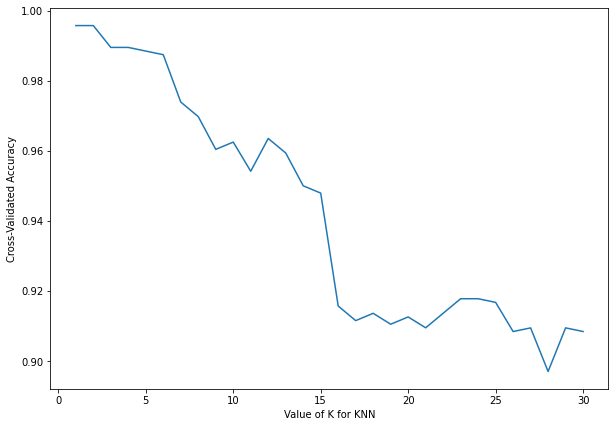

In [ ]:
# choose k between 1 to 31
k_range = range(1, 31)
k_scores_accu = []
# use iteration to caclulator different k in models, then return the average accuracy based on the cross validation
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, wordFeatures,  targetLabel, cv=5, scoring='accuracy')
    k_scores_accu.append(scores.mean())
# plot to see clearly
plt.figure(1, figsize=(10, 7))
plt.plot(k_range, k_scores_accu)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.show()

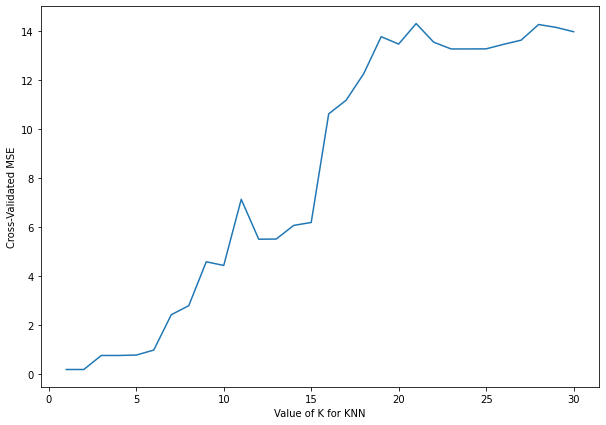

In [ ]:
k_range = range(1, 31)
k_scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    loss = abs(cross_val_score(knn, wordFeatures,  targetLabel, cv=5, scoring='neg_mean_squared_error'))
    k_scores.append(loss.mean())
plt.figure(1, figsize=(10, 7))    
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated MSE')
plt.show()

In [ ]:
print(k_scores_accu)
print(k_scores)

[0.9958549222797928, 0.9958549222797928, 0.9896211139896373, 0.9896211139896373, 0.9885794473229707, 0.9875377806563039, 0.9740231001727115, 0.9698726252158896, 0.9605192141623489, 0.9625971502590674, 0.9542800086355786, 0.9636334196891191, 0.959488341968912, 0.9501187392055268, 0.9480408031088082, 0.915808506044905, 0.9116418393782384, 0.9137251727115716, 0.9106109671848014, 0.9126943005181346, 0.9095908894645941, 0.9137359671848013, 0.9178918393782384, 0.9178918393782384, 0.9168501727115717, 0.9085222366148532, 0.9095639032815199, 0.8971178756476684, 0.9095746977547495, 0.9085330310880829]
[0.17305699481865283, 0.17305699481865283, 0.7466213298791019, 0.7466213298791019, 0.7632879965457686, 0.967454663212435, 2.4119548791019, 2.7814766839378238, 4.576306131260795, 4.426505829015544, 7.1297711571675295, 5.49907707253886, 5.5062823834196895, 6.064140759930916, 6.183009499136442, 10.622857297063904, 11.182766623488773, 12.263514680483592, 13.776284542314334, 13.476284542314335, 14.31355

Based on the loss and acuraccy, we could find the 1 or 2 as K is best.

In [ ]:
knn_clf = KNeighborsClassifier(n_neighbors=2)
knn_clf.fit(X_train, y_train)
y_pred_knn = knn_clf.predict(X_test)
print("Accuracy: " , metrics.accuracy_score(y_test, y_pred_knn))
print(metrics.classification_report(y_test, y_pred_knn))

Accuracy:  1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      1.00      1.00         3
           2       1.00      1.00      1.00         5
           3       1.00      1.00      1.00         9
           4       1.00      1.00      1.00         3
           5       1.00      1.00      1.00         4
           6       1.00      1.00      1.00         5
           7       1.00      1.00      1.00         7
           8       1.00      1.00      1.00        11
           9       1.00      1.00      1.00         7
          10       1.00      1.00      1.00        10
          11       1.00      1.00      1.00         5
          12       1.00      1.00      1.00         6
          13       1.00      1.00      1.00         7
          14       1.00      1.00      1.00        10
          15       1.00      1.00      1.00        16
          16       1.00      1.00      1.00         8
          17



*   As the k values increase the accuracy is decreasing
*   When the k is 1 or 2, the model has the highest accuracy. 
* Possiblely overfitting could be happening with KNN classification. We need to approach with other methods. 




We are suggesting to categorise the data in more general career fields. 

##Model Selection2_ RNN
reference : https://blog.knoldus.com/best-approach-for-resume-screening-by-machine-learning/

In [ ]:
import tensorflow as tf

### Preprocessing data


In [ ]:
copy_df = df.copy(deep = True)
copy_df.head() 

,Category,Resume,cleaned_resume
0,Data Science,Skills * Programming Languages: Python (pandas...,Skills Programming Languages Python pandas num...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...,Education Details May 2013 to May 2017 B E UIT...
2,Data Science,"Areas of Interest Deep Learning, Control Syste...",Areas of Interest Deep Learning Control System...
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...,Skills R Python SAP HANA Tableau SAP HANA SQL ...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab...",Education Details MCA YMCAUST Faridabad Haryan...


In [ ]:
data_features = copy_df['cleaned_resume'].values
data_labels = copy_df['Category'].values
labels = data_labels[:] #Slice every element in the array

In [ ]:
np.unique(labels, return_counts=True )

(array(['Advocate', 'Arts', 'Automation Testing', 'Blockchain',
        'Business Analyst', 'Civil Engineer', 'Data Science', 'Database',
        'DevOps Engineer', 'DotNet Developer', 'ETL Developer',
        'Electrical Engineering', 'HR', 'Hadoop', 'Health and fitness',
        'Java Developer', 'Mechanical Engineer',
        'Network Security Engineer', 'Operations Manager', 'PMO',
        'Python Developer', 'SAP Developer', 'Sales', 'Testing',
        'Web Designing'], dtype=object),
 array([20, 36, 26, 40, 28, 24, 40, 33, 55, 28, 40, 30, 44, 42, 30, 84, 40,
        25, 40, 30, 48, 24, 40, 70, 45]))

In [ ]:
from sklearn.utils import shuffle


# Get features and labels from data and shuffle
features = copy_df['cleaned_resume'].values
original_labels = copy_df['Category'].values
labels = original_labels[:]

for i in range(len(copy_df)):
  labels[i] = str(labels[i].lower())  # convert to lowercase
  labels[i] = labels[i].replace(" ", "")  # use hyphens to convert multi-token labels into single tokens

features, labels = shuffle(features, labels)

# Print example feature and label
print(features[0])
print(labels[0])

QUALIFICATION Introduction to Computer EXTRAEducation Details January 2001 to January 2003 Master Law Chennai Tamil Nadu Dr Ambedkar Law University January 1998 to January 2001 Bachelor Law Chennai Tamil Nadu Dr Ambedkar Law University January 1995 to January 1998 Bachelor English Literature Tirunelveli Tamil Nadu Manonmaniam Sundaranar university Advocate Advocate Skill Details Company Details company Practiced description at High Court of Judicature at Madras India City Civil Court Chennai Debt Recovery Tribunal Chennai Consumer Forums Chennai Labour Courts Small Causes Courts Rent control Courts Legal advisor for Christian Institute of Management Chennai in 2016 Legal Advisor for Ruah church Chennai and NESSA Trust till 2018
advocate


In [ ]:

# Split into train and test
train_split = 0.8
train_size = int(train_split * len(copy_df))

train_features = features[:train_size]
train_labels = labels[:train_size]

In [ ]:
# Split into test and valid 
test_split = 0.5
remain_size = len(df)- len(train_features)
test_size = int(test_split* remain_size)
valid_size = train_size + test_size;

valid_features = features[train_size:valid_size]
valid_labels = labels[train_size:valid_size]

test_features = features[valid_size:]
test_labels = labels[valid_size:]

# Print size of each split
print(len(train_labels))
print(len(valid_labels))
print(len(test_labels))


769
96
97


In [ ]:
print(769+96+97)

962


In [ ]:
test_labels.dtype

dtype('O')

https://analyticsindiamag.com/complete-guide-to-bidirectional-lstm-with-python-codes/

https://www.kirenz.com/post/2022-06-17-sentiment-analysis-with-tensorflow-and-keras/

In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer


# Tokenize feature data
vocab_size = 6000
oov_tok = '<>'

feature_tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
feature_tokenizer.fit_on_texts(features)

feature_index = feature_tokenizer.word_index
print(dict(list(feature_index.items())[:20]))

# Print example sequences from train and test datasets
train_feature_sequences = feature_tokenizer.texts_to_sequences(train_features)
valid_feature_sequences = feature_tokenizer.texts_to_sequences(valid_features)
test_feature_sequences = feature_tokenizer.texts_to_sequences(test_features)

{'<>': 1, 'and': 2, 'the': 3, 'of': 4, 'to': 5, 'in': 6, 'for': 7, 'exprience': 8, 'with': 9, 'company': 10, 'a': 11, 'project': 12, 'months': 13, 'description': 14, 'details': 15, 'on': 16, 'as': 17, 'data': 18, '1': 19, 'management': 20}


In [ ]:
# Tokenize label data 
label_tokenizer = Tokenizer(lower=True)
label_tokenizer.fit_on_texts(labels)

label_index = label_tokenizer.word_index
print(dict(list(label_index.items())))

# Print example label encodings from train and test datasets
train_label_sequences = label_tokenizer.texts_to_sequences(train_labels)
valid_label_sequences = label_tokenizer.texts_to_sequences(valid_labels)
test_label_sequences = label_tokenizer.texts_to_sequences(test_labels)


{'javadeveloper': 1, 'testing': 2, 'devopsengineer': 3, 'pythondeveloper': 4, 'webdesigning': 5, 'hr': 6, 'hadoop': 7, 'mechanicalengineer': 8, 'blockchain': 9, 'datascience': 10, 'etldeveloper': 11, 'operationsmanager': 12, 'sales': 13, 'arts': 14, 'database': 15, 'electricalengineering': 16, 'healthandfitness': 17, 'pmo': 18, 'businessanalyst': 19, 'dotnetdeveloper': 20, 'automationtesting': 21, 'networksecurityengineer': 22, 'sapdeveloper': 23, 'civilengineer': 24, 'advocate': 25}


In [ ]:
print(len(train_feature_sequences),len(valid_feature_sequences), len(test_feature_sequences))

769 96 97


In [ ]:
print(len(train_label_sequences),len(valid_label_sequences), len(test_label_sequences))

769 96 97


In [ ]:

# Pad sequences for feature data
max_length = 300
trunc_type = 'post'
pad_type = 'post'

train_feature_padded = pad_sequences(train_feature_sequences, maxlen=max_length, padding=pad_type, truncating=trunc_type)
valid_feature_padded = pad_sequences(valid_feature_sequences, maxlen=max_length, padding=pad_type, truncating=trunc_type)
test_feature_padded = pad_sequences(test_feature_sequences, maxlen=max_length, padding=pad_type, truncating=trunc_type)

# Print example padded sequences from train and test datasets
print(train_feature_padded[0])
print(valid_feature_padded[0])
print(test_feature_padded[0])


[1927 3680    5  111    1   15   42 1731    5   42 1337  587 1102 1473
 2301 2302  450    1 1102   67   42 2054    5   42 1731  284 1102 1473
 2301 2302  450    1 1102   67   42 2055    5   42 2054  284  563    1
    1 2301 2302    1    1   67 1677 1677   41   15   10   15   10    1
   14   80  205 1961    4    1   80    1   68 2903  388 1961 1473 5921
 1194    1 1473 2607 5167 1473 3358 3181 1732 1605 3181 5168  140 3181
 1004 3302    7    1  277    4   20 1473    6  156 1004 3302    7    1
    1 1473    2    1  357  411  293    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0 

### Training with a Squential Model 

Why do we use bidirectional LSTM?
=> 
https://towardsdatascience.com/nlp-text-generation-through-bidirectional-lstm-model-9af29da4e520

In [ ]:
embedding_dim = 64
#embedding_dim = 30
model = tf.keras.Sequential([
  # Add an Embedding layer expecting input vocab of size 6000, and output embedding dimension of size 64 we set at the top
  tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=1),
  tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(embedding_dim)),

  # use ReLU in place of tanh function since they are very good alternatives of each other.
  #tf.keras.layers.Dense(embedding_dim, activation='relu'),
  tf.keras.layers.Dense(embedding_dim, activation='tanh'),

  # Add a Dense layer with 25 units and softmax activation for probability distribution
  tf.keras.layers.Dense(26, activation='softmax')
])

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 1, 64)             384000    
                                                                 
 bidirectional_2 (Bidirectio  (None, 128)              66048     
 nal)                                                            
                                                                 
 dense_4 (Dense)             (None, 64)                8256      
                                                                 
 dense_5 (Dense)             (None, 26)                1690      
                                                                 
Total params: 459,994
Trainable params: 459,994
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Compile the model and convert train/test data into NumPy arrays
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Features
train_feature_padded = np.array(train_feature_padded)
valid_feature_padded = np.array(valid_feature_padded)
test_feature_padded = np.array(test_feature_padded)

# Labels
train_label_sequences = np.array(train_label_sequences)
valid_label_sequences = np.array(valid_label_sequences)
test_label_sequences = np.array(test_label_sequences)

In [ ]:
train_feature_padded.shape

(769, 300)

In [ ]:
train_label_sequences.shape

(769, 1)

In [ ]:

# Train the neural network
num_epochs = 10

history = model.fit(train_feature_padded, train_label_sequences, epochs=num_epochs, validation_data=(valid_feature_padded, valid_label_sequences), verbose=2)

Epoch 1/10


25/25 - 9s - loss: 3.1763 - accuracy: 0.0910 - val_loss: 3.0900 - val_accuracy: 0.0729 - 9s/epoch - 357ms/step
Epoch 2/10
25/25 - 5s - loss: 2.7137 - accuracy: 0.2172 - val_loss: 2.3626 - val_accuracy: 0.3021 - 5s/epoch - 188ms/step
Epoch 3/10
25/25 - 5s - loss: 2.2643 - accuracy: 0.3199 - val_loss: 2.0934 - val_accuracy: 0.4062 - 5s/epoch - 190ms/step
Epoch 4/10
25/25 - 5s - loss: 1.8594 - accuracy: 0.4473 - val_loss: 1.6902 - val_accuracy: 0.5000 - 5s/epoch - 190ms/step
Epoch 5/10
25/25 - 6s - loss: 1.5251 - accuracy: 0.6008 - val_loss: 1.3965 - val_accuracy: 0.5729 - 6s/epoch - 223ms/step
Epoch 6/10
25/25 - 5s - loss: 1.3230 - accuracy: 0.5982 - val_loss: 1.2142 - val_accuracy: 0.6146 - 5s/epoch - 205ms/step
Epoch 7/10
25/25 - 5s - loss: 1.0407 - accuracy: 0.7165 - val_loss: 0.9355 - val_accuracy: 0.7812 - 5s/epoch - 185ms/step
Epoch 8/10
25/25 - 5s - loss: 0.7991 - accuracy: 0.8336 - val_loss: 0.8154 - val_accuracy: 0.7917 - 5s/epoch - 185ms/step
Epoch 9/10
25/25 - 5s - loss: 0.639

In [ ]:
score = model.evaluate(test_feature_padded, test_label_sequences, verbose=1)


print("Test Score:", score[0])
print("Test Accuracy:", score[1])

4/4 [==============================] - 1s 41ms/step - loss: 0.6893 - accuracy: 0.7938
Test Score: 0.6892936825752258
Test Accuracy: 0.7938144207000732


Dimension 30 Test score and accuracy
[1.1444745063781738, 0.7113401889801025]

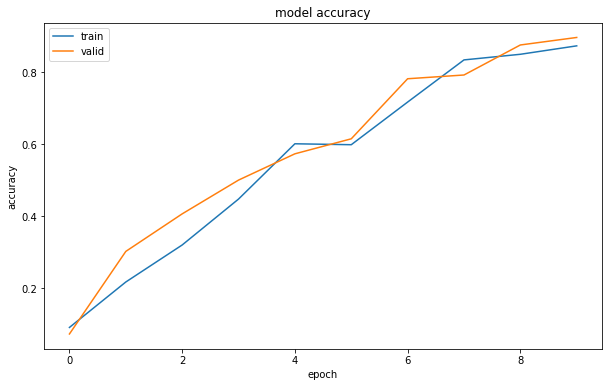

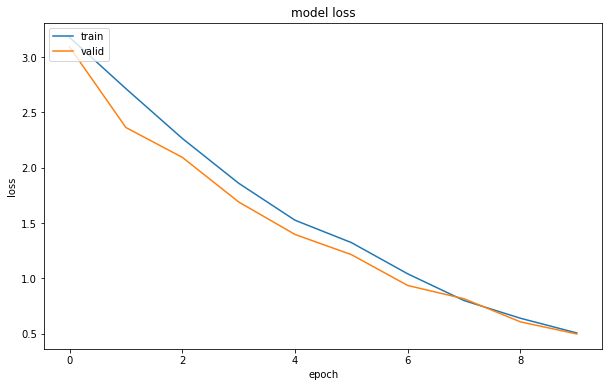

In [ ]:
plt.figure(1, figsize=(10, 6))

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','valid'], loc='upper left')
plt.show()

plt.figure(1, figsize=(10, 6))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','valid'], loc='upper left')
plt.show()

##Combine categories 

In [ ]:
df_copy2 = df.copy(deep = True)
df_copy2

,Category,Resume,cleaned_resume
0,Data Science,Skills * Programming Languages: Python (pandas...,Skills Programming Languages Python pandas num...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...,Education Details May 2013 to May 2017 B E UIT...
2,Data Science,"Areas of Interest Deep Learning, Control Syste...",Areas of Interest Deep Learning Control System...
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...,Skills R Python SAP HANA Tableau SAP HANA SQL ...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab...",Education Details MCA YMCAUST Faridabad Haryan...
...,...,...,...
957,Testing,Computer Skills: â¢ Proficient in MS office (...,Computer Skills Proficient in MS office Word B...
958,Testing,â Willingness to accept the challenges. â ...,Willingness to a ept the challenges Positive ...
959,Testing,"PERSONAL SKILLS â¢ Quick learner, â¢ Eagerne...",PERSONAL SKILLS Quick learner Eagerness to lea...
960,Testing,COMPUTER SKILLS & SOFTWARE KNOWLEDGE MS-Power ...,COMPUTER SKILLS SOFTWARE KNOWLEDGE MS Power Po...


In [ ]:
Tech = ['Data Science', 'Java Developer', 'Testing', 'DevOps Engineer', 'Python Developer', 'Web Designing', 'Hadoop', 'Blockchain',
        'ETL Developer', 'Database', 'DotNet Developer', 'Automation Testing', 'Network Security Engineer', 'SAP Developer']
Non_Tech = ['HR', 'Operations Manager', 'Sales', 'Arts', 'Health and fitness', 'PMO', 'Business Analyst', 'Advocate']
Engineering = ['Mechanical Engineer', 'Electrical Engineering', 'Civil Engineer']

In [ ]:
df_new2 = df.copy(deep=True)

In [ ]:
df_new2['Category'] = np.where(df_copy2['Category'].isin(Tech), 'Tech', df_new2['Category'])

In [ ]:
df_new2.Category.value_counts() 

Tech                      600
HR                         44
Mechanical Engineer        40
Sales                      40
Operations Manager         40
Arts                       36
Health and fitness         30
Electrical Engineering     30
PMO                        30
Business Analyst           28
Civil Engineer             24
Advocate                   20
Name: Category, dtype: int64

In [ ]:
df_new2['Category'] = np.where(df_copy2['Category'].isin(Non_Tech), 'NonTech', df_new2['Category'])

In [ ]:
df_new2['Category'] = np.where(df_copy2['Category'].isin(Engineering), 'Engineering', df_new2['Category'])

In [ ]:
df_new2.Category.value_counts()

Tech           600
NonTech        268
Engineering     94
Name: Category, dtype: int64

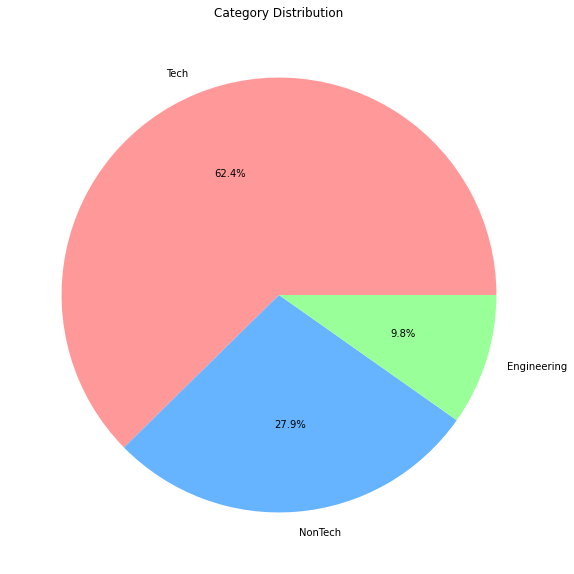

In [ ]:
item_counts2 = df_new2['Category'].value_counts()
data_labels2 = df_new2['Category'].unique()
plt.figure(1, figsize=(22, 22))
grid = GridSpec(2,2)

colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99','#E6E6FA']
plt.subplot(grid[0,1], aspect =1, title = 'Category Distribution')
source_pie = plt.pie(item_counts2, labels= data_labels2, colors = colors, autopct = '%1.1f%%')
plt.show()


In [ ]:
new_df2 = df_new2.copy(deep = True)
new_df2.head() 
labels_new = ['Category']
le = LabelEncoder()
for i in labels_new:
  new_df2[i] = le.fit_transform(new_df2[i])

In [ ]:
new_df2.Category.value_counts() 

2    600
1    268
0     94
Name: Category, dtype: int64

In [ ]:
targetText2 = new_df2['cleaned_resume'].values
targetLabel2 = new_df2['Category'].values
vectorizer2 = TfidfVectorizer(
    sublinear_tf = True,
    stop_words='english',
    max_features=1500)
vectorizer2.fit(targetText2)
wordFeatures2 = vectorizer2.transform(targetText2)

In [ ]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(wordFeatures2,  targetLabel2, random_state = 2, test_size= 0.2)
print(X_train2.shape)
print(X_test2.shape)

(769, 1500)
(193, 1500)


###KNN_Combined

In [ ]:
clf2 = OneVsRestClassifier(KNeighborsClassifier())
clf2.fit(X_train2, y_train2)
prediction2 = clf2.predict(X_test2)

In [ ]:
print(clf2.score(X_train2, y_train2))
print(clf2.score(X_test2, y_test2 ))

0.9947984395318595
0.9948186528497409


In [ ]:
from sklearn import metrics
print(metrics.classification_report(y_test2, prediction2))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97        17
           1       1.00      1.00      1.00        48
           2       1.00      0.99      1.00       128

    accuracy                           0.99       193
   macro avg       0.98      1.00      0.99       193
weighted avg       1.00      0.99      0.99       193



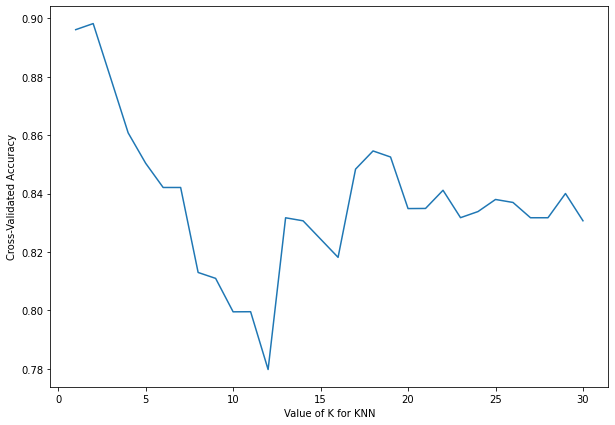

In [ ]:
# Finding the best K 
# k_range = range(1, 31)
# scores2 = []
# for k in k_range:
#   model_knn = KNeighborsClassifier(n_neighbors= k)
#   model_knn.fit(X_train2, y_train2)
#   y_pred2 = model_knn.predict(X_test2)
#   scores2.append(metrics.accuracy_score(y_test2, y_pred2))

# print(scores)

# choose k between 1 to 31
k_range = range(1, 31)
k_scores_accu = []
# use iteration to caclulator different k in models, then return the average accuracy based on the cross validation
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, wordFeatures2,  targetLabel2, cv=5, scoring='accuracy')
    k_scores_accu.append(scores.mean())
# plot to see clearly
plt.figure(1, figsize=(10, 7))
plt.plot(k_range, k_scores_accu)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.show()

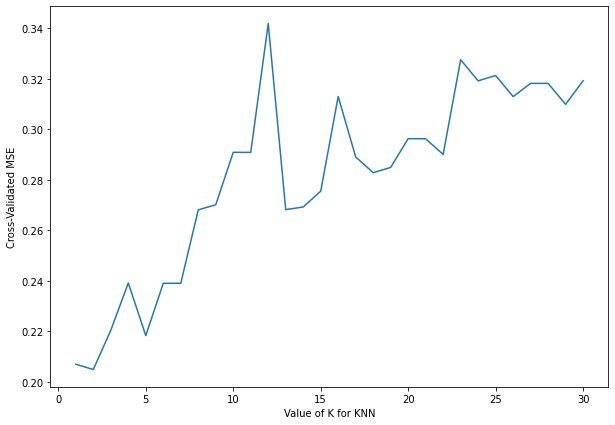

In [ ]:
k_range = range(1, 31)
k_scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    loss = abs(cross_val_score(knn, wordFeatures2,  targetLabel2, cv=5, scoring='neg_mean_squared_error'))
    k_scores.append(loss.mean())
plt.figure(1, figsize=(10, 7))    
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated MSE')
plt.show()

In [ ]:
print(k_scores_accu)
print(k_scores)

[0.8960600172711572, 0.8981433506044907, 0.8794958981001727, 0.8607458981001728, 0.8503508203799655, 0.8420606649395509, 0.8420606649395509, 0.812980354058722, 0.8109617875647668, 0.799519645941278, 0.7995520293609671, 0.7797819516407599, 0.831692573402418, 0.8306563039723661, 0.8244063039723661, 0.8181563039723662, 0.84834304835924, 0.854560664939551, 0.8524881260794472, 0.8348445595854923, 0.8348877374784112, 0.841105354058722, 0.831730354058722, 0.833824481865285, 0.8379587651122625, 0.8369386873920552, 0.8317087651122625, 0.8317087651122625, 0.839998920552677, 0.8306724956822107]
[0.20703259930915374, 0.2049492659758204, 0.2204717184801382, 0.23922171848013818, 0.21836679620034544, 0.2390921848013817, 0.2390921848013817, 0.2681724956822107, 0.2701910621761658, 0.29095962867012093, 0.2909272452504318, 0.341947322970639, 0.2682750431778929, 0.2693113126079447, 0.2755613126079447, 0.31306131260794473, 0.2891245682210708, 0.28290695164075996, 0.2849794905008635, 0.29637305699481864, 0.

Based on the loss and acuraccy, we could find the 2 as K is best.

In [ ]:
knn_clf = KNeighborsClassifier(n_neighbors=2)
knn_clf.fit(X_train2, y_train2)
y_pred_knn2 = knn_clf.predict(X_test2)
print("Accuracy: " , metrics.accuracy_score(y_test2, y_pred_knn2))
print(metrics.classification_report(y_test2, y_pred_knn2))

Accuracy:  0.9948186528497409
              precision    recall  f1-score   support

           0       0.94      1.00      0.97        17
           1       1.00      1.00      1.00        48
           2       1.00      0.99      1.00       128

    accuracy                           0.99       193
   macro avg       0.98      1.00      0.99       193
weighted avg       1.00      0.99      0.99       193



### RNN_combined

In [ ]:
df_new3 = df_new2.copy(deep = True)
features2 = df_new3['cleaned_resume'].values
original_labels2 = df_new3['Category'].values
labels2 = original_labels2[:]

for i in range(len(df_new3)):
  labels2[i] = str(labels2[i].lower())  # convert to lowercase
  labels2[i] = labels2[i].replace(" ", "")  # use hyphens to convert multi-token labels into single tokens

features2, labels2 = shuffle(features2, labels2)

# Print example feature and label
print(features2[0])
print(labels2[0])

Personal Skills Good verbal and written communication skills Ability to deal with people diplomatically Willingness to learn Other Qualifications Seema Institute Ansalon Body massage and scalp Swedish Thai body Foot Reflexology Aromatherapy Completed course of 2 months Talwalkars Fitness academy with gym and aerobics Completed 3 months course in fitness training Radio Bhavan The Career Super Market Hotel and Front Office Management Completed course of 3 months Slender Gender Done diploma in Spa Management 4 Months Education Details Fitness Trainer cum Team Leader Fitness Trainer cum Team Leader Think Healthy Skill Details Company Details company Think Healthy description Job Responsibilities Perform related duties and responsibilities as assigned Achieve Fitness Goal Training people to do work outs in Gym Handling customer s queries related therapies Refreshers etc company Raymond Gym description Job Responsibilities Perform related duties and responsibilities as assigned Handling cust

In [ ]:

# Split into train and test
train_split = 0.8
train_size = int(train_split * len(df_new3))

train_features2 = features2[:train_size]
train_labels2 = labels2[:train_size]

In [ ]:
# Split into test and valid 
test_split = 0.5
remain_size = len(df_new3)- len(train_features2)
test_size = int(test_split* remain_size)
valid_size = train_size + test_size;

valid_features2 = features2[train_size:valid_size]
valid_labels2 = labels2[train_size:valid_size]

test_features2 = features2[valid_size:]
test_labels2 = labels2[valid_size:]

# Print size of each split
print(len(train_labels2))
print(len(valid_labels2))
print(len(test_labels2))


769
96
97


In [ ]:
unique, counts = np.unique(test_labels2, return_counts=True)
print(np.asarray((unique, counts)).T)

[['engineering' 8]
 ['nontech' 25]
 ['tech' 64]]


In [ ]:
test_labels2

array(['tech', 'tech', 'tech', 'tech', 'engineering', 'tech', 'tech',
       'tech', 'nontech', 'tech', 'tech', 'nontech', 'tech', 'tech',
       'nontech', 'nontech', 'nontech', 'tech', 'tech', 'tech', 'tech',
       'tech', 'tech', 'nontech', 'tech', 'tech', 'nontech', 'tech',
       'tech', 'nontech', 'nontech', 'tech', 'tech', 'tech', 'nontech',
       'tech', 'engineering', 'engineering', 'tech', 'nontech', 'nontech',
       'tech', 'engineering', 'tech', 'tech', 'tech', 'tech', 'nontech',
       'nontech', 'nontech', 'engineering', 'tech', 'tech', 'tech',
       'tech', 'nontech', 'tech', 'tech', 'tech', 'tech', 'tech',
       'engineering', 'tech', 'tech', 'nontech', 'engineering', 'tech',
       'tech', 'tech', 'tech', 'tech', 'tech', 'nontech', 'tech',
       'nontech', 'nontech', 'tech', 'tech', 'nontech', 'tech', 'tech',
       'tech', 'tech', 'tech', 'nontech', 'engineering', 'tech',
       'nontech', 'tech', 'tech', 'nontech', 'tech', 'tech', 'tech',
       'tech', 'nontec

In [ ]:
df_test = pd.DataFrame(test_labels2, columns = ['Category'])
print(df_test)

       Category
0          tech
1          tech
2          tech
3          tech
4   engineering
..          ...
92         tech
93         tech
94         tech
95      nontech
96         tech

[97 rows x 1 columns]


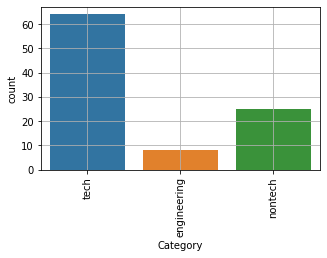

In [ ]:
import seaborn as sns
plt.figure(figsize=(5,3))
plt.xticks(rotation=90)
ax=sns.countplot(x='Category', data=df_test)
# for p in ax:
#     ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
plt.grid()

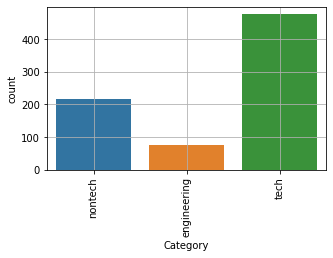

In [ ]:
df_train = pd.DataFrame(train_labels2, columns = ['Category'])
plt.figure(figsize=(5,3))
plt.xticks(rotation=90)
ax=sns.countplot(x='Category', data=df_train)
plt.grid()

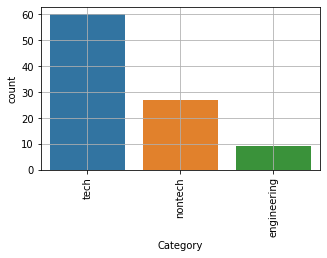

In [ ]:
df_valid = pd.DataFrame(valid_labels2, columns = ['Category'])
plt.figure(figsize=(5,3))
plt.xticks(rotation=90)
ax=sns.countplot(x='Category', data=df_valid)
plt.grid()

In [ ]:
feature_tokenizer2 = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
feature_tokenizer2.fit_on_texts(features2)

feature_index2 = feature_tokenizer2.word_index
print(dict(list(feature_index.items())[:20]))

# Print example sequences from train and test datasets
train_feature_sequences2 = feature_tokenizer2.texts_to_sequences(train_features2)
valid_feature_sequences2 = feature_tokenizer2.texts_to_sequences(valid_features2)
test_feature_sequences2 = feature_tokenizer2.texts_to_sequences(test_features2)

{'<>': 1, 'and': 2, 'the': 3, 'of': 4, 'to': 5, 'in': 6, 'for': 7, 'exprience': 8, 'with': 9, 'company': 10, 'a': 11, 'project': 12, 'months': 13, 'description': 14, 'details': 15, 'on': 16, 'as': 17, 'data': 18, '1': 19, 'management': 20}


In [ ]:
label_tokenizer2 = Tokenizer(lower=True)
label_tokenizer2.fit_on_texts(labels2)

label_index = label_tokenizer2.word_index
print(dict(list(label_index.items())))

# Print example label encodings from train and test datasets
train_label_sequences2 = label_tokenizer2.texts_to_sequences(train_labels2)
valid_label_sequences2 = label_tokenizer2.texts_to_sequences(valid_labels2)
test_label_sequences2 = label_tokenizer2.texts_to_sequences(test_labels2)

{'tech': 1, 'nontech': 2, 'engineering': 3}


In [ ]:
max_length = 300
trunc_type = 'post'
pad_type = 'post'
train_feature_padded2 = pad_sequences(train_feature_sequences2, maxlen=max_length, padding=pad_type, truncating=trunc_type)
valid_feature_padded2 = pad_sequences(valid_feature_sequences2, maxlen=max_length, padding=pad_type, truncating=trunc_type)
test_feature_padded2 = pad_sequences(test_feature_sequences2, maxlen=max_length, padding=pad_type, truncating=trunc_type)

# Print example padded sequences from train and test datasets
print(train_feature_padded2[0])
print(valid_feature_padded2[0])
print(test_feature_padded2[0])

[ 355   51  162 2014    2 1184  218   51  321    5 1455    9  397 3120
 2268    5  650  193 2054 5921  277 5922 1847 5923    2 5924 5925  666
 1847 3121 5926 5927  144  725    4   70   13 2369  291 1265    9  766
    2 5928  144  102   13  725    6  291  106 5929 5930    3 1961 4439
  844  753    2  785  153   20  144  725    4  102   13 5931 4324  507
  246    6 2117   20  107   13   55   15  291 1266 3680   21  491  291
 1266 3680   21  491 2055 3681   41   15   10   15   10 2055 3681   14
  129   56  362  152  757    2   56   17 1090  651  291  786  106  397
    5 1217   49 2269    6  766  119   63   22  199  152 1927 3122  117
   10 5932  766   14  129   56  362  152  757    2   56   17 1090  119
  156  199  152 1927   10 5933  666 3121 2117   14  362  152  757    2
   56   17 1090  119  156  199  152 1927 3122  117  419  199   16 1375
   17  215   17 2301  611  970    4  332 1102   10  243   19  766   14
  129   56  362  152  757    2   56   17 1090  119   11   21  415  940
 2903 

In [ ]:
# Define the neural network
embedding_dim = 180

model2 = tf.keras.Sequential([
  # Add an Embedding layer expecting input vocab of size 6000, and output embedding dimension of size 64 we set at the top
  tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=1),
  tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(embedding_dim)),

  # tf.keras.layers.Dense(embedding_dim, activation='relu'),
  tf.keras.layers.Dense(embedding_dim, activation='tanh'),


  # Add a Dense layer with 4 units and softmax activation for probability distribution
  tf.keras.layers.Dense(4, activation='softmax')
])

model2.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 1, 180)            1080000   
                                                                 
 bidirectional_3 (Bidirectio  (None, 360)              519840    
 nal)                                                            
                                                                 
 dense_6 (Dense)             (None, 180)               64980     
                                                                 
 dense_7 (Dense)             (None, 4)                 724       
                                                                 
Total params: 1,665,544
Trainable params: 1,665,544
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Compile the model and convert train/test data into NumPy arrays
model2.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Features
train_feature_padded2 = np.array(train_feature_padded2)
valid_feature_padded2 = np.array(valid_feature_padded2)
test_feature_padded2 = np.array(test_feature_padded2)

# Labels
train_label_sequences2 = np.array(train_label_sequences2)
valid_label_sequences2 = np.array(valid_label_sequences2)
test_label_sequences2 = np.array(test_label_sequences2)

In [ ]:
print(len(train_feature_padded2))
print(len(test_feature_padded2))
print(len(valid_feature_padded2))

769
97
96


In [ ]:
num_epochs = 9
history2 = model2.fit(train_feature_padded2, train_label_sequences2, epochs=num_epochs, validation_data=(valid_feature_padded2, valid_label_sequences2), verbose=2)

Epoch 1/9


25/25 - 28s - loss: 0.9906 - accuracy: 0.6801 - val_loss: 0.6312 - val_accuracy: 0.8333 - 28s/epoch - 1s/step
Epoch 2/9
25/25 - 24s - loss: 0.3336 - accuracy: 0.8947 - val_loss: 0.4029 - val_accuracy: 0.9479 - 24s/epoch - 955ms/step
Epoch 3/9
25/25 - 24s - loss: 0.0620 - accuracy: 0.9896 - val_loss: 0.1030 - val_accuracy: 0.9583 - 24s/epoch - 952ms/step
Epoch 4/9
25/25 - 24s - loss: 0.0067 - accuracy: 0.9987 - val_loss: 0.0665 - val_accuracy: 0.9896 - 24s/epoch - 946ms/step
Epoch 5/9
25/25 - 25s - loss: 6.1433e-04 - accuracy: 1.0000 - val_loss: 0.0692 - val_accuracy: 0.9896 - 25s/epoch - 1s/step
Epoch 6/9
25/25 - 23s - loss: 3.4072e-04 - accuracy: 1.0000 - val_loss: 0.0726 - val_accuracy: 0.9896 - 23s/epoch - 932ms/step
Epoch 7/9
25/25 - 23s - loss: 2.3984e-04 - accuracy: 1.0000 - val_loss: 0.0757 - val_accuracy: 0.9896 - 23s/epoch - 939ms/step
Epoch 8/9
25/25 - 23s - loss: 1.8706e-04 - accuracy: 1.0000 - val_loss: 0.0777 - val_accuracy: 0.9896 - 23s/epoch - 936ms/step
Epoch 9/9
25/25 

In [ ]:
score2 = model.evaluate(test_feature_padded2, test_label_sequences2, verbose=1)

print("Test Score:", score2[0])
print("Test Accuracy:", score2[1])

4/4 [==============================] - 0s 36ms/step - loss: 3.3926 - accuracy: 0.1753
Test Score: 3.392597198486328
Test Accuracy: 0.17525772750377655


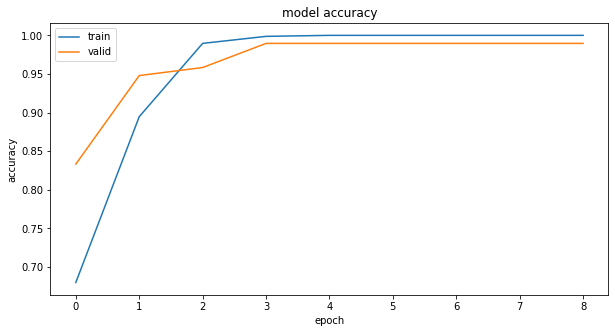

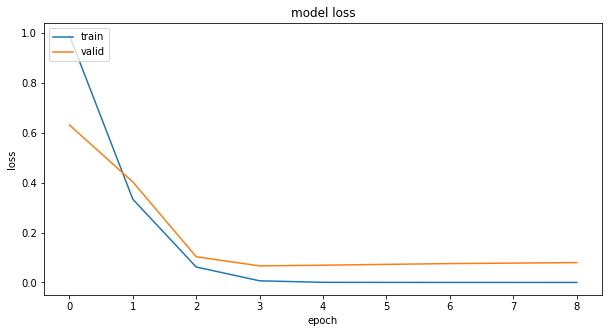

In [ ]:
plt.figure(1, figsize=(10, 5))
plt.plot(history2.history['accuracy'])
plt.plot(history2.history['val_accuracy'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','valid'], loc='upper left')
plt.show()

plt.figure(1, figsize=(10, 5))
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','valid'], loc='upper left')
plt.show()

<ipython-input-234-1c6484a3b55e>:10: MatplotlibDeprecationWarning: Unrecognized location 'below right'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  plt.legend(['train_combined','valid_combined', 'train_original', 'valid_original'], loc='below right')


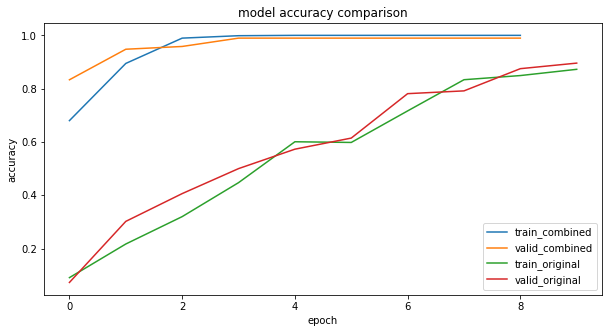

In [ ]:

plt.figure(1, figsize=(10, 5))
plt.plot(history2.history['accuracy'])
plt.plot(history2.history['val_accuracy'])
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.title('model accuracy comparison')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train_combined','valid_combined', 'train_original', 'valid_original'], loc='below right')
plt.show()



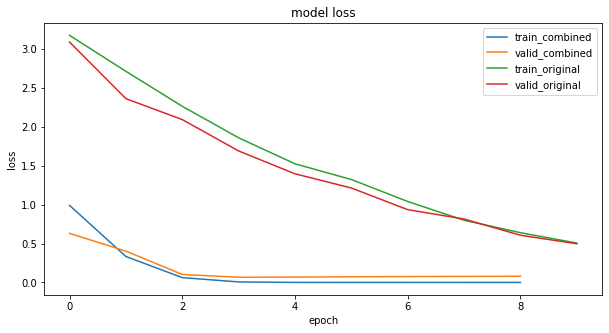

In [ ]:
plt.figure(1, figsize=(10, 5))

plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])


plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train_combined','valid_combined', 'train_original', 'valid_original'], loc='upper right')
plt.show()